# Notebook Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Datapoints and features

In [6]:
type(boston_dataset.data)

numpy.ndarray

In [7]:
boston_dataset.data.shape

(506, 13)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
#pricec in thousants
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas dataframes

In [10]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with pice (target)
data["PRICE"] = boston_dataset.target

In [11]:
data.head() # top 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
data.tail() # bottom 5 rows 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [13]:
data.count() # shows number of rows per column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - chceck for missing values

In [14]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions, Bar Charts

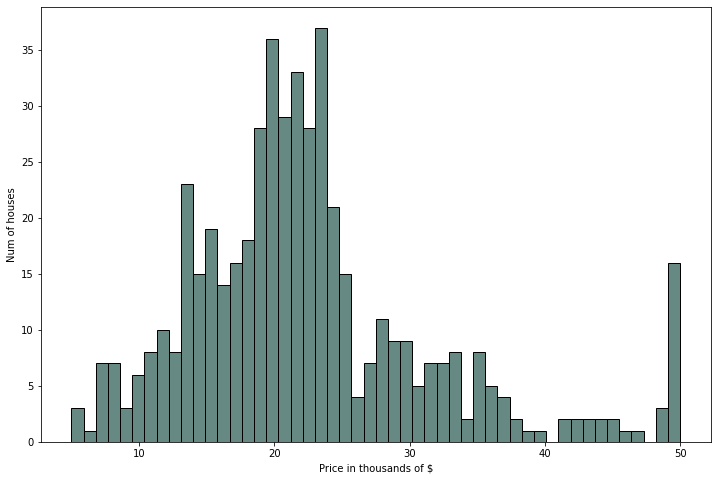

In [16]:
plt.figure(figsize=(12, 8))
plt.hist(data["PRICE"], bins=50, ec="black", color="#678983")
plt.xlabel("Price in thousands of $")
plt.ylabel("Num of houses")
plt.show()

C:\Users\Pyszaki\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


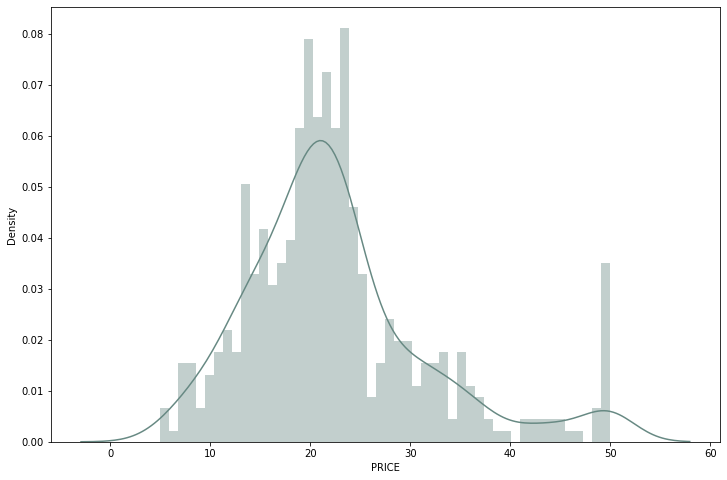

In [17]:
plt.figure(figsize=(12, 8))
sns.distplot(data["PRICE"], bins=50, color="#678983")
plt.show()

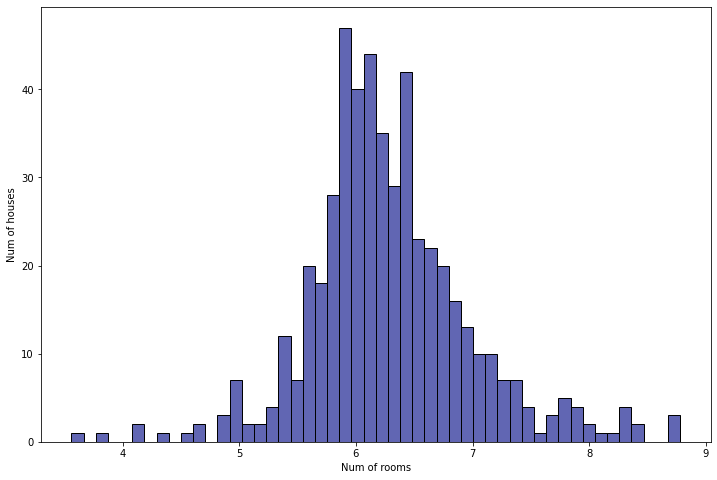

In [18]:
plt.figure(figsize=(12, 8))
plt.hist(data["RM"], bins=50, ec="black", color="#6166B3")
plt.xlabel("Num of rooms")
plt.ylabel("Num of houses")
plt.show()

In [19]:
# def average(column):
#    return sum(column) / len(column)

# av_num_rooms = average(data["RM"])

av_num_rooms = data["RM"].mean()

print(f"Average num of rooms: {av_num_rooms}")

Average num of rooms: 6.284634387351787


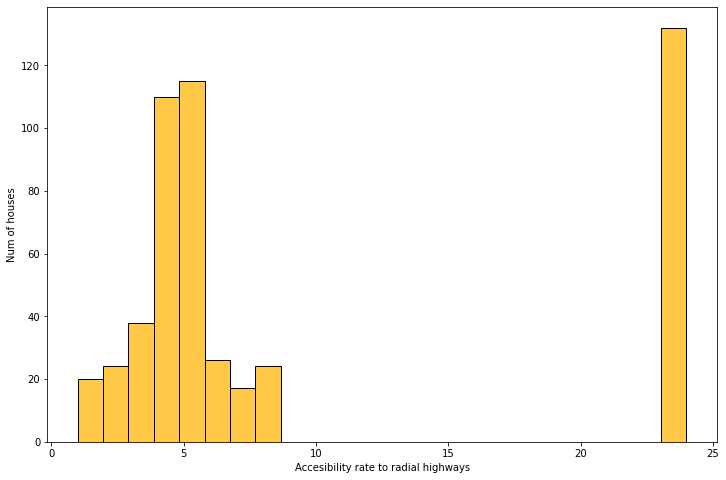

In [20]:
plt.figure(figsize=(12, 8))
plt.hist(data["RAD"], bins=24, ec="black", color="#FFC947")
plt.xlabel("Accesibility rate to radial highways")
plt.ylabel("Num of houses")
plt.show()

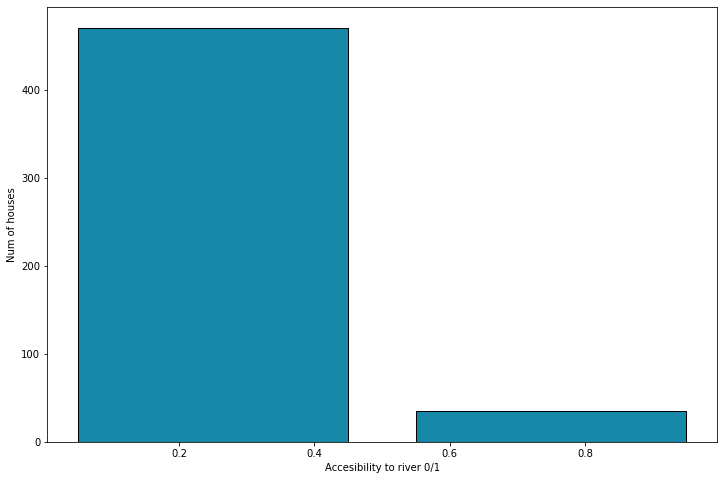

In [21]:
plt.figure(figsize=(12, 8))
plt.hist(data["CHAS"], bins=2, ec="black", color="#1687A7", rwidth=0.8)
plt.xlabel("Accesibility to river 0/1")
plt.ylabel("Num of houses")
plt.show()

## Descriptive Statistics

In [22]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Corelation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [23]:
data["PRICE"].corr(data["RM"])

0.6953599470715393

In [24]:
data["PRICE"].corr(data["PTRATIO"])

-0.5077866855375621

In [25]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [26]:
mask = np.zeros_like(data.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

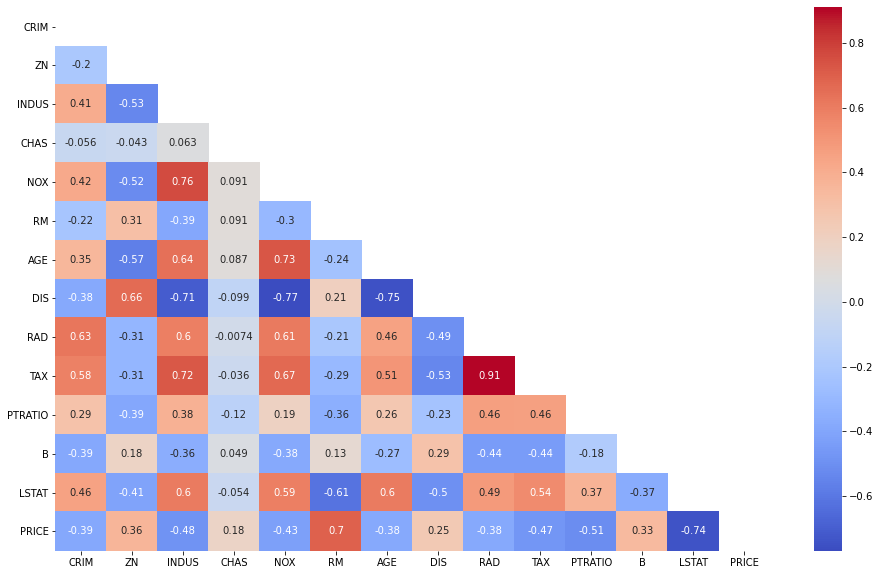

In [27]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, mask=mask, cmap="coolwarm")
plt.show()

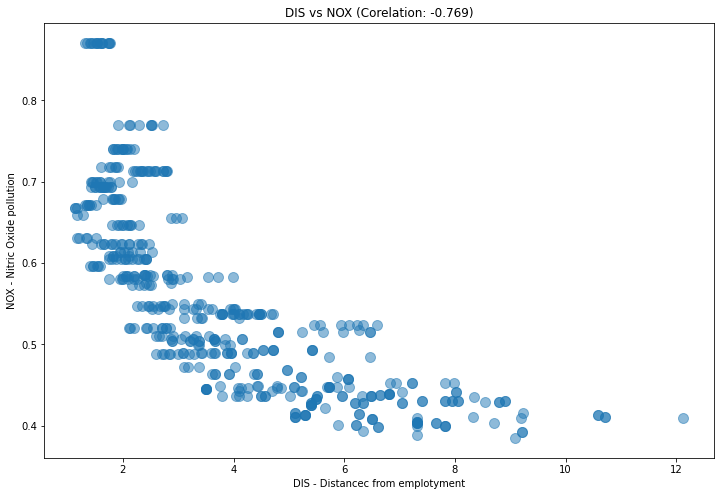

In [28]:
nox_dix_corr = round(data["NOX"].corr(data["DIS"]), 3)

plt.figure(figsize=(12, 8))
plt.scatter(data["DIS"], data["NOX"], alpha=0.5, s=100)
plt.title(f"DIS vs NOX (Corelation: {nox_dix_corr})")
plt.ylabel("NOX - Nitric Oxide pollution")
plt.xlabel("DIS - Distancec from emplotyment")
plt.show()

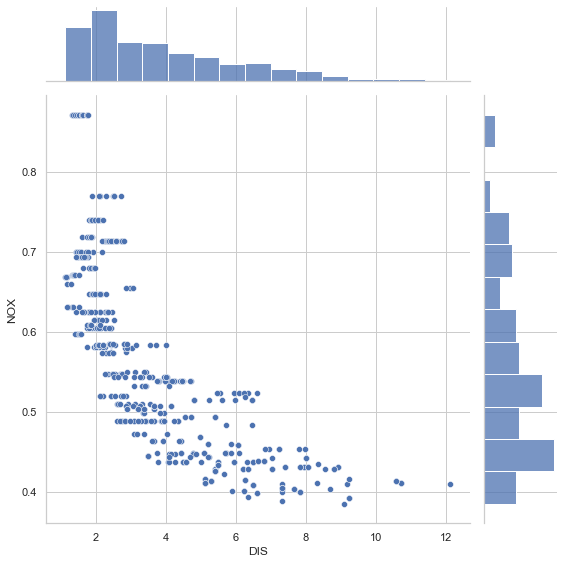

In [29]:
sns.set_theme()
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.jointplot(x=data["DIS"], y=data["NOX"], height=8)
plt.show()

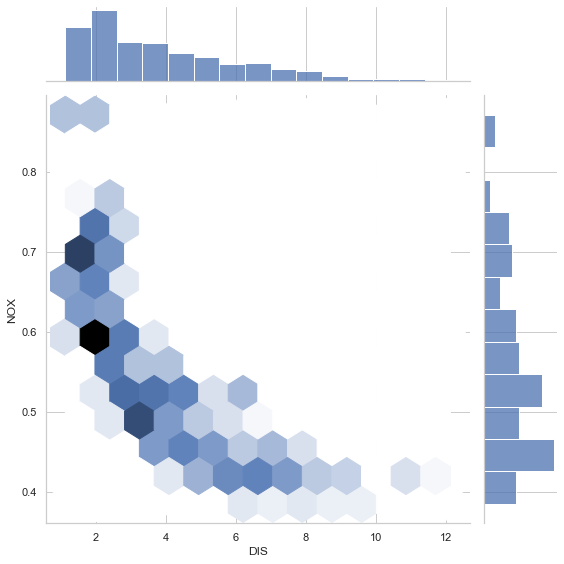

In [30]:
sns.set_theme()
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.jointplot(x=data["DIS"], y=data["NOX"], height=8, kind="hex")
plt.show()

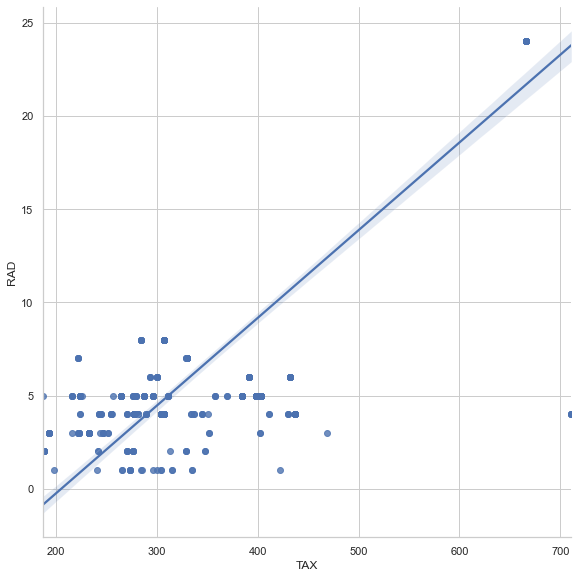

In [31]:
sns.lmplot(x="TAX", y="RAD", data=data, height=8)
plt.show()

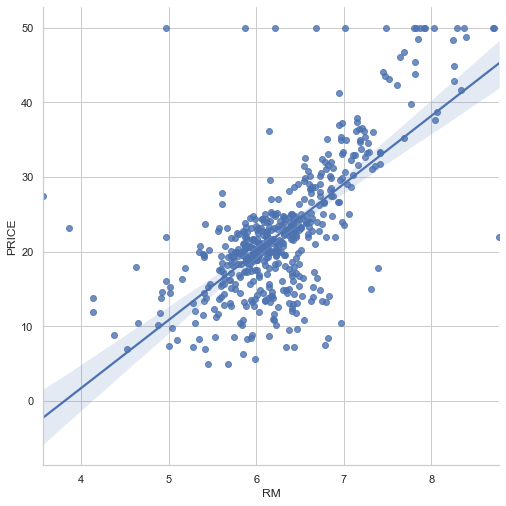

In [32]:
sns.lmplot(x="RM", y="PRICE", data=data, height=7)
plt.show()

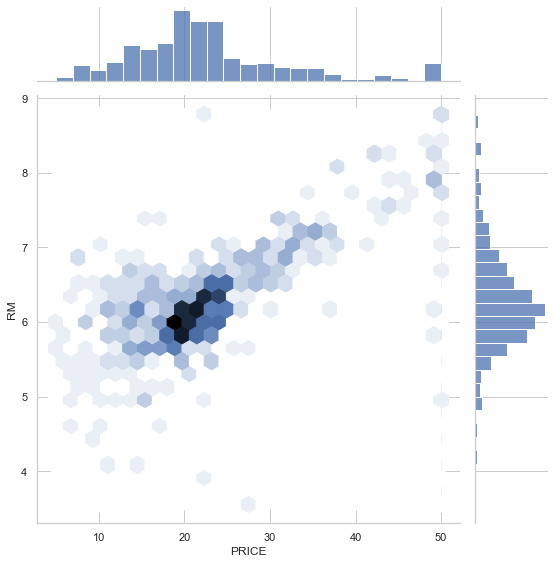

In [33]:
sns.set_theme()
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.jointplot(x=data["PRICE"], y=data["RM"], height=8, kind="hex")
plt.show()

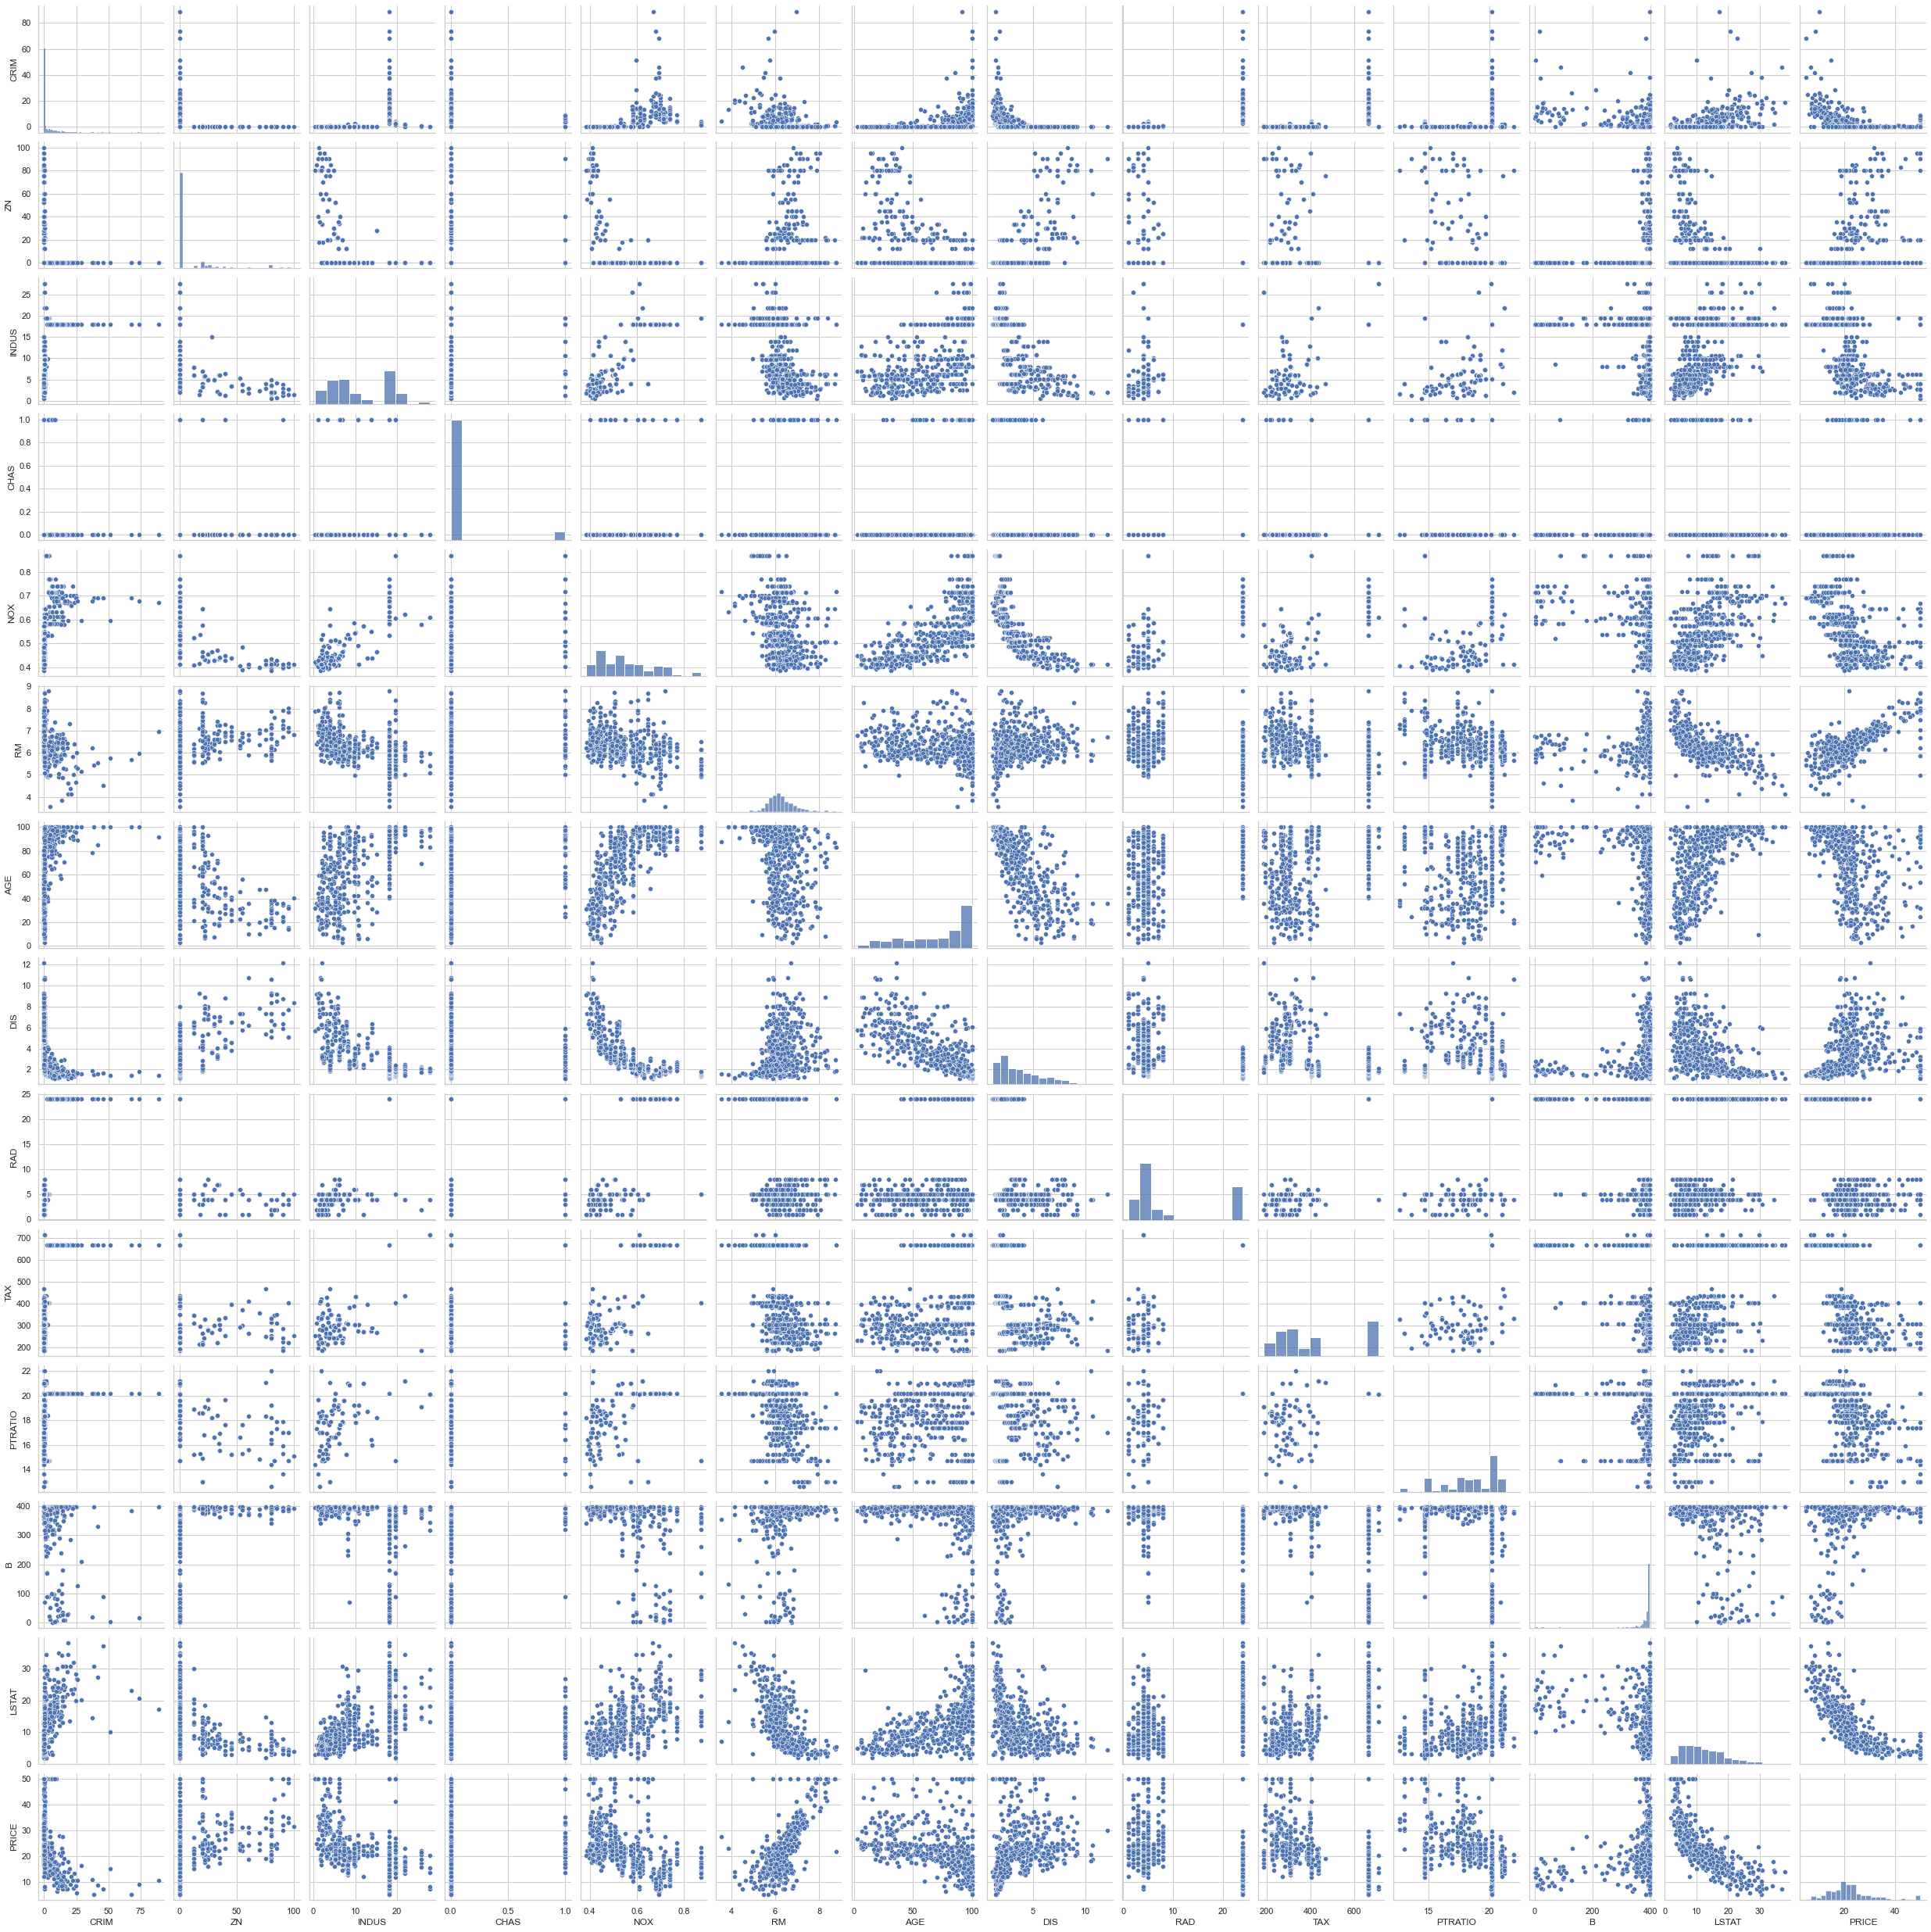

Wall time: 15.4 s


In [34]:
%%time

sns.pairplot(data)
plt.show()

NameError: name 'plt_show' is not defined

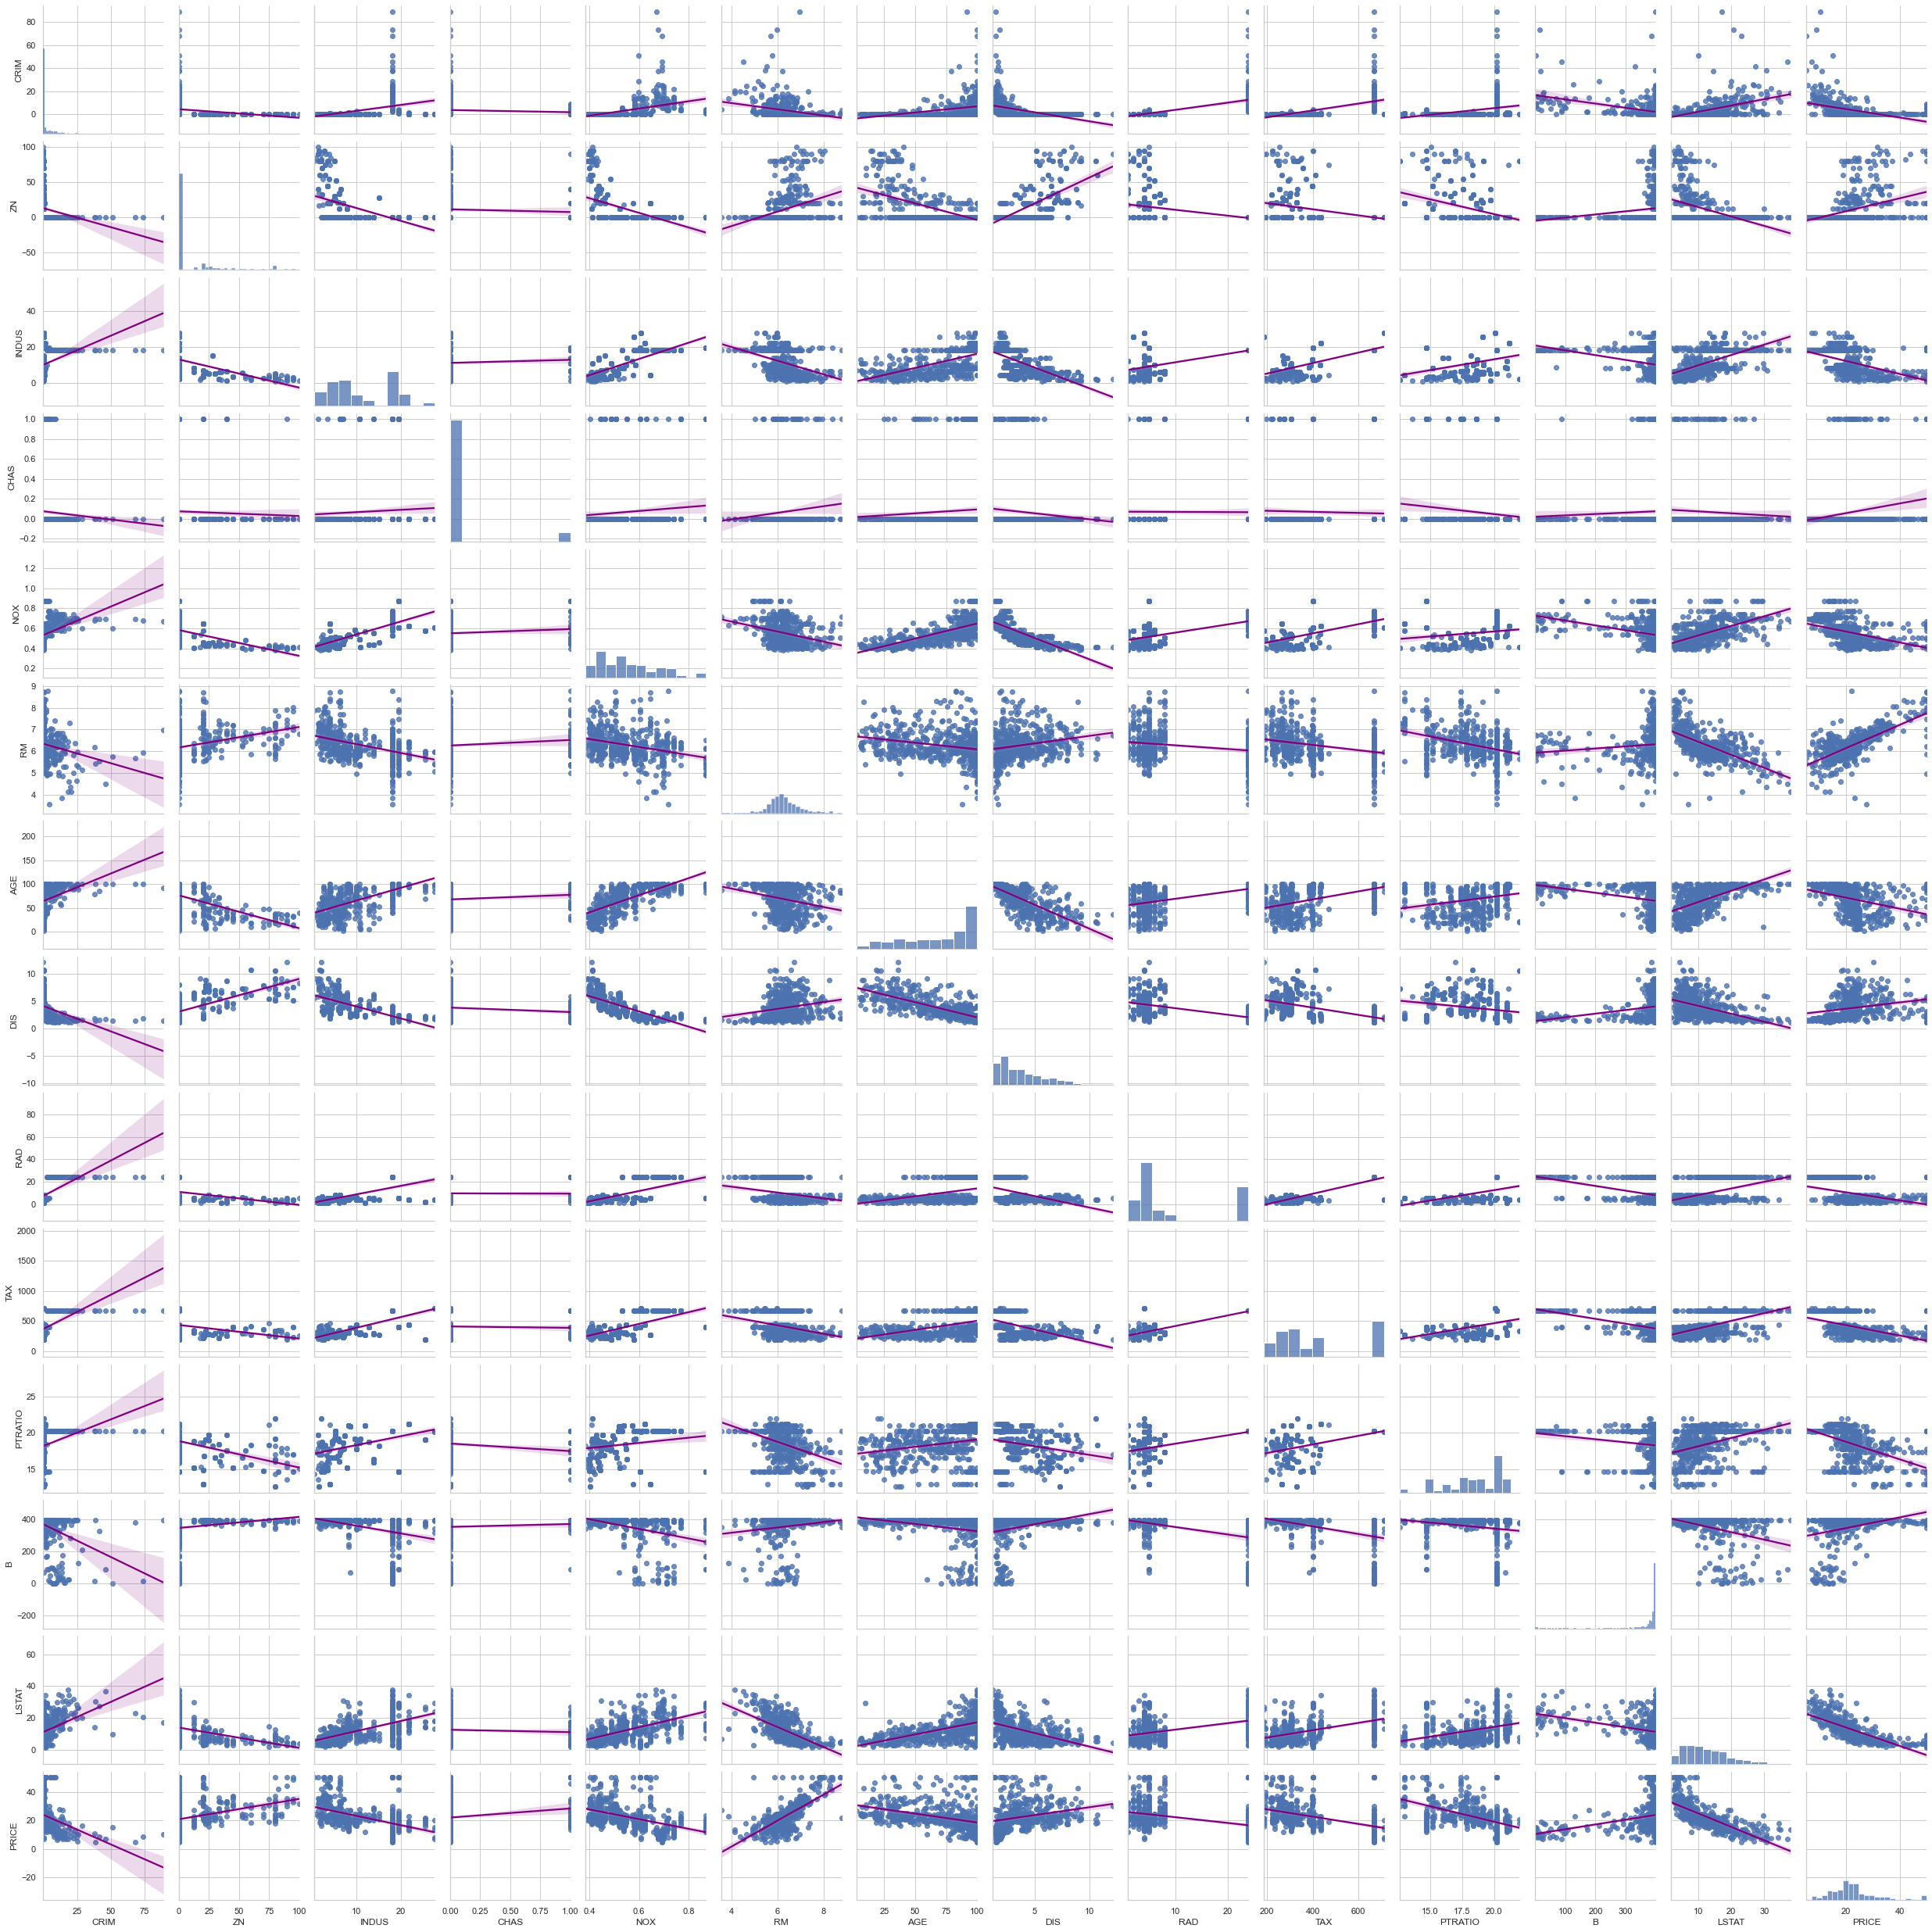

In [35]:
%%time

sns.pairplot(data, kind="reg", plot_kws={"line_kws": {"color": "purple"}})
plt_show()

## Training & Testing Data Split

In [36]:
prices = data["PRICE"]
features = data.drop("PRICE", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)


## Multivariable Regression

In [37]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print(f"Training data score: {regr.score(X_train, y_train)}")
print(f"Test data score: {regr.score(X_test, y_test)}")

print("Intercept:", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=boston_dataset.feature_names, columns=["Coef"])

Training data score: 0.750121534530608
Test data score: 0.6709339839115642
Intercept: 36.53305138282472


,Coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations

In [38]:
data["PRICE"].skew()

1.1080984082549072

In [39]:
y_log = np.log(data["PRICE"])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

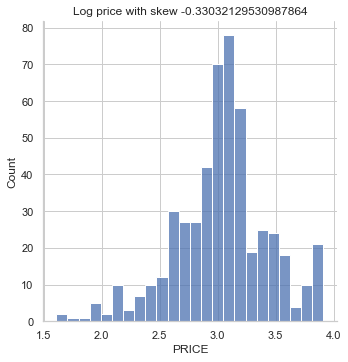

In [40]:
sns.displot(y_log)
plt.title(f"Log price with skew {y_log.skew()}")
plt.show()

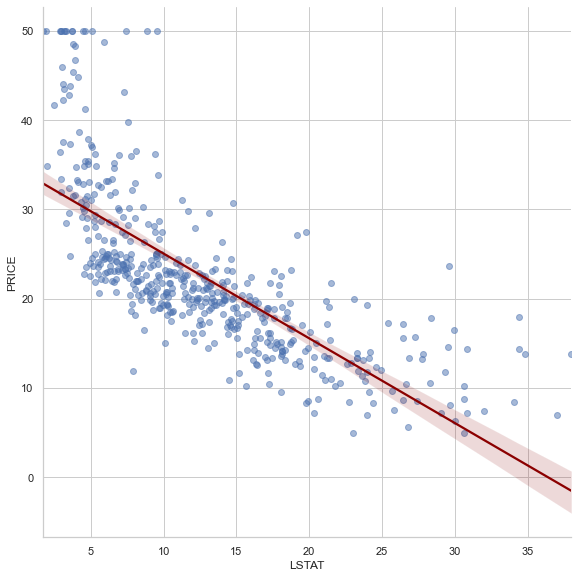

In [41]:
sns.lmplot(x="LSTAT", y="PRICE", data=data, height=8,
           scatter_kws={"alpha": 0.5}, line_kws={"color": "darkred"})
plt.show()

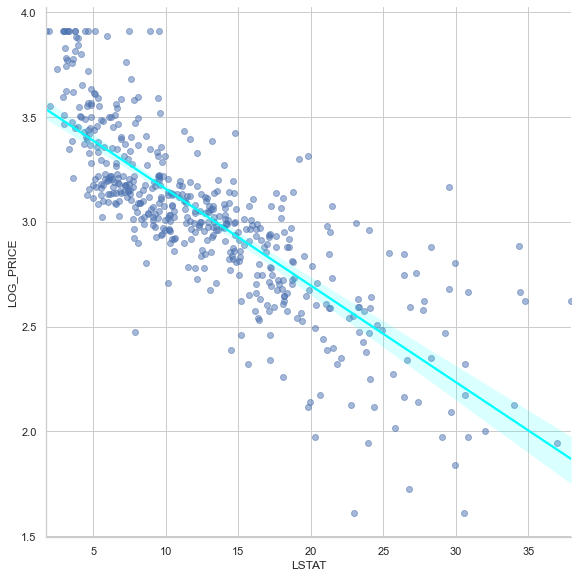

In [42]:
traformed_data = features
traformed_data["LOG_PRICE"] = y_log

sns.lmplot(x="LSTAT", y="LOG_PRICE", data=traformed_data, height=8,
           scatter_kws={"alpha": 0.5}, line_kws={"color": "cyan"})
plt.show()

## Regression using log prices

In [43]:
prices = np.log(data["PRICE"])
features = data.drop("PRICE", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print(f"Training data score: {regr.score(X_train, y_train)}")
print(f"Test data score: {regr.score(X_test, y_test)}")

print("Intercept:", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=boston_dataset.feature_names, columns=["Coef"])

Training data score: 0.7930234826697583
Test data score: 0.7446922306260737
Intercept: 4.059943871775207


,Coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [44]:
# Charls River Property Premium
np.e**0.080331

1.0836456950439142

## p values & Evaluating Coeficients

In [45]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# results.params
# results.pvalues

pd.DataFrame({"coef": results.params, "p-value": results.pvalues.round(3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicolinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _12 LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R_{TAX} ^ 2)}$$

In [46]:
vif_list = []
print(f"Variance Inflation Factors:")
for index in range(len(X_incl_const.columns)):
    vif = variance_inflation_factor(exog=X_incl_const.values, exog_idx=index)
    vif_list.append(vif.round(2))
    
pd.DataFrame({"coef_name": X_incl_const.columns,
             "vif": vif_list})

Variance Inflation Factors:


,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification and BIC

In [47]:
# Original model with log pricies and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({"coef": results.params, "p-value": results.pvalues.round(3)})

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          1.70e-124
Time:                        12:01:31   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.0

In [48]:
# Reduced model #1 excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({"coef": results.params, "p-value": results.pvalues.round(3)})

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     124.6
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          1.99e-125
Time:                        12:01:31   Log-Likelihood:                 111.58
No. Observations:                 404   AIC:                            -197.2
Df Residuals:                     391   BIC:                            -145.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0562      0.227     17.878      0.0

In [49]:
# Reduced model #1 excluding INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS", "AGE"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({"coef": results.params, "p-value": results.pvalues.round(3)})

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.6
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          3.68e-126
Time:                        12:01:31   Log-Likelihood:                 110.76
No. Observations:                 404   AIC:                            -197.5
Df Residuals:                     392   BIC:                            -149.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0359      0.226     17.819      0.0

In [50]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals & Residual Plot

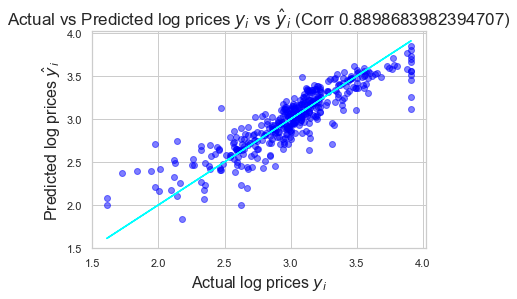

In [51]:
# Modified model transformed using log prices and dropping 2 features

prices = np.log(data["PRICE"])
features = data.drop(["PRICE", "INDUS", "AGE"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

# Using Statsmodel

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Greaph actual vs. predicted prices
corr = y_train.corr(results.fittedvalues)
corr.round(2)

plt.scatter(x=y_train, y=results.fittedvalues, c="blue", alpha=0.5)
plt.plot(y_train, y_train, c="cyan")

plt.xlabel("Actual log prices $y _i$", fontsize=16)
plt.ylabel("Predicted log prices $\hat y _i$", fontsize=16)
plt.title(f"Actual vs Predicted log prices $y _i$ vs $\hat y _i$ (Corr {corr})", fontsize=17)

plt.show()

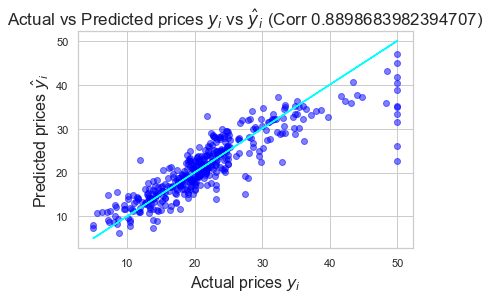

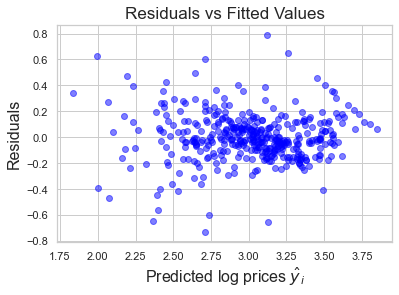

In [52]:
corr = y_train.corr(results.fittedvalues)
corr.round(2)

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c="blue", alpha=0.5)
plt.plot(np.e**y_train, np.e**y_train, c="cyan")

plt.xlabel("Actual prices $y _i$", fontsize=16)
plt.ylabel("Predicted prices $\hat y _i$", fontsize=16)
plt.title(f"Actual vs Predicted prices $y _i$ vs $\hat y _i$ (Corr {corr})", fontsize=17)

plt.show()

# Residuals vs Predicted Value

plt.scatter(x=results.fittedvalues, y=results.resid, c="blue", alpha=0.5)

plt.xlabel("Predicted log prices $\hat y _i$", fontsize=16)
plt.ylabel("Residuals", fontsize=16)
plt.title(f"Residuals vs Fitted Values", fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

C:\Users\Pyszaki\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

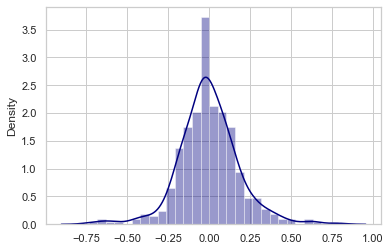

In [53]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = results.resid.mean()
results.resid.skew()

sns.distplot(results.resid, color="navy")

In [55]:
pd.DataFrame({"R-Squared": [reduced_log_rsquared],
              "MSE": [reduced_log_mse],
              "RMSE": np.sqrt([reduced_log_mse]),
             })

,R-Squared,MSE,RMSE
0,0.792,0.035,0.187083


In [60]:
upper_bound = np.e**(np.log(30) + 2*(np.sqrt(reduced_log_mse)))
lower_bound = np.e**(np.log(30) - 2*(np.sqrt(reduced_log_mse)))
print(f"In thousants dollars estimated upper bound is:{upper_bound}, and lower is:{lower_bound}")

In thousants dollars estimated upper bound is:43.61334233239937, and lower is:20.635886906824155
